In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [5]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [17]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [9]:
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_df = cars[numeric_cols]
numeric_df = numeric_df.astype('float')

In [18]:
numeric_df.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
numeric_df.shape

(205, 14)

In [23]:
numeric_df.dropna(subset=['price'],inplace=True)
numeric_df.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [26]:
numeric_df.fillna(numeric_df.mean(), inplace=True)

In [27]:
numeric_df.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_df['price']
numeric_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())
numeric_df['price'] = price_col

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor();
    np.random.seed(1)
    
    rand_df = df.iloc[np.random.permutation(len(df))]
    
    half = len(rand_df) // 2
    
    train = rand_df[:half]
    test = rand_df[half:]
    
    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    mse = mean_squared_error(predictions, test[target_col])
    rmse = np.sqrt(mse)
    return rmse

In [41]:
train_col = numeric_df.columns.drop('price')
target_col = 'price'

In [42]:
rmse_results = {}

for col in train_col:
    rmse_results[col] = knn_train_test(col, 'price', numeric_df)

rmse_result_series = pd.Series(rmse_results)
rmse_result_series.sort_values()

horsepower           0.100219
curb-weight          0.109258
highway-mpg          0.114940
width                0.116789
city-mpg             0.118326
length               0.134730
wheel-base           0.135583
compression-rate     0.164113
bore                 0.168329
normalized-losses    0.181972
peak-rpm             0.191089
stroke               0.198762
height               0.202186
dtype: float64

In [44]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_df.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_df)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 0.19479545715577634,
  3: 0.18620152455962941,
  5: 0.1819720384646851,
  7: 0.19255304071878562,
  9: 0.19085686154836978},
 'wheel-base': {1: 0.11155687574625128,
  3: 0.12710792676789912,
  5: 0.13558298986825523,
  7: 0.13524916963860611,
  9: 0.14245582853861061},
 'length': {1: 0.11490133313180999,
  3: 0.127348091481857,
  5: 0.13473017627815678,
  7: 0.13190575743130861,
  9: 0.13363424146848335},
 'width': {1: 0.11318348885234251,
  3: 0.11435414557792316,
  5: 0.11678870437675352,
  7: 0.11348704250520464,
  9: 0.11550851924104531},
 'height': {1: 0.22104280960132835,
  3: 0.20549152581911342,
  5: 0.20218561746347616,
  7: 0.19064589951824074,
  9: 0.19390884422104737},
 'curb-weight': {1: 0.13068592003274115,
  3: 0.12467896360054696,
  5: 0.10925768965774101,
  7: 0.10750727631244858,
  9: 0.11499042933455146},
 'bore': {1: 0.21355912031430069,
  3: 0.17338363262700254,
  5: 0.16832897534099539,
  7: 0.17074867101736585,
  9: 0.1704684102586369},


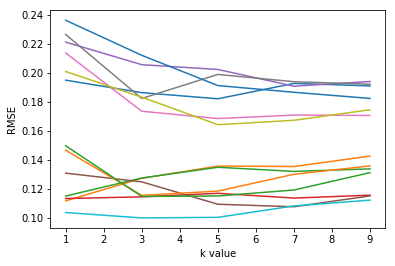

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.show()

## DON'T FORGET TO SHUFFLE


In [59]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    n = len(df) // 2
    train = df[:n]
    test = df[n:]
    k_values = [5]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[train_cols], train[target_col])
        predictions = knn.predict(test[train_cols])
        mse = mean_squared_error(predictions, test[target_col])
        k_rmses[k] = np.sqrt(mse)
    return k_rmses

In [60]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_df)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_df)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_df)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_df)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_df)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'two best features': {5: 0.10182801234938725},
 'three best features': {5: 0.11585964817961018},
 'four best features': {5: 0.11669349112072323},
 'five best features': {5: 0.11102428895880442},
 'six best features': {5: 0.1309867151362932}}

In [112]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_idx)
    
    n = len(df) // 2
    train = rand_df[:n]
    test = rand_df[n:]
    
    k_vals = range(1, 25)
    k_rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[train_cols], train[target_col])
        predictions = knn.predict(test[train_cols])
        mse = mean_squared_error(predictions, test[target_col])
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [103]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [113]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_df)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_df)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_df)
k_rmse_results["four best features"] = rmse_val

k_rmse_results

{'two best features': {1: 0.10083812385259944,
  2: 0.086825365224943649,
  3: 0.084476174560702319,
  4: 0.089047326841658614,
  5: 0.089104643816278487,
  6: 0.091357504123318056,
  7: 0.093265676085369648,
  8: 0.097755087092598475,
  9: 0.10124493798644581,
  10: 0.10336697219126981,
  11: 0.1066763309404012,
  12: 0.10850387318754108,
  13: 0.11172389724167753,
  14: 0.11429811597454889,
  15: 0.11407936788394846,
  16: 0.11432981654113557,
  17: 0.11447506538497647,
  18: 0.11416717602952114,
  19: 0.11369755453965684,
  20: 0.11553465184728628,
  21: 0.11814398638084585,
  22: 0.11935370511200559,
  23: 0.12078151251501873,
  24: 0.12190843972600138},
 'three best features': {1: 0.074797949419695836,
  2: 0.069839778805074165,
  3: 0.078734553509723304,
  4: 0.079000887289563435,
  5: 0.082069910625017811,
  6: 0.087446175683937644,
  7: 0.093698853320475908,
  8: 0.098777844298225406,
  9: 0.099124265939846107,
  10: 0.10119254623356101,
  11: 0.10318227325186949,
  12: 0.10429

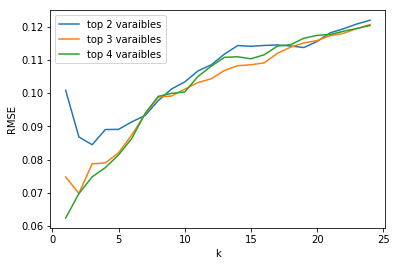

In [114]:
for k, v in k_rmse_results.items():
    x = v.keys()
    y = v.values()
    plt.plot(x, y)
plt.xlabel('k')
plt.ylabel('RMSE')
legend = list(map(lambda x: 'top ' + str(x) + ' varaibles', range(2, 7)))
plt.legend(legend)
plt.show()
